In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [51]:
data = pd.read_csv("/content/sample_data/online payment fraud detection.csv")

# Map transaction type to numeric (simplified)
data["type"] = data["type"].map({
    "CASH_OUT": 1,
    "PAYMENT": 2,
    "CASH_IN": 3,
    "TRANSFER": 4,
    "DEBIT": 5
})

# Drop unnecessary columns (like IDs or names)
data.drop(["nameOrig", "nameDest"], axis=1, inplace=True)

# Drop rows with NaN after mapping
data.dropna(inplace=True)


In [52]:
#Split Features and Target
X = data.drop("isFraud", axis=1)
y = data["isFraud"]


In [53]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [55]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
#Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = model.predict(X_test_scaled)


In [60]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[314228      2]
 [    76    267]]


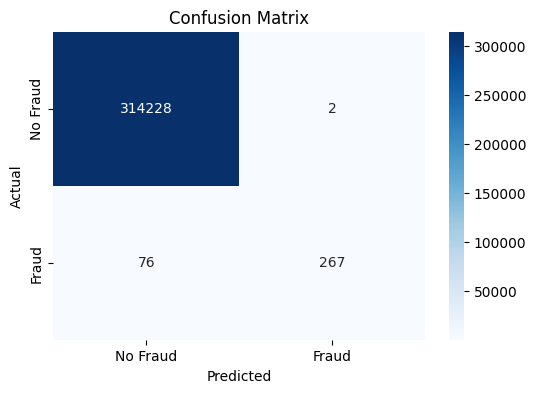

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [61]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.99      0.78      0.87       343

    accuracy                           1.00    314573
   macro avg       1.00      0.89      0.94    314573
weighted avg       1.00      1.00      1.00    314573



In [63]:
# ROC-AUC Score
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

ROC-AUC Score: 0.9777052685313694


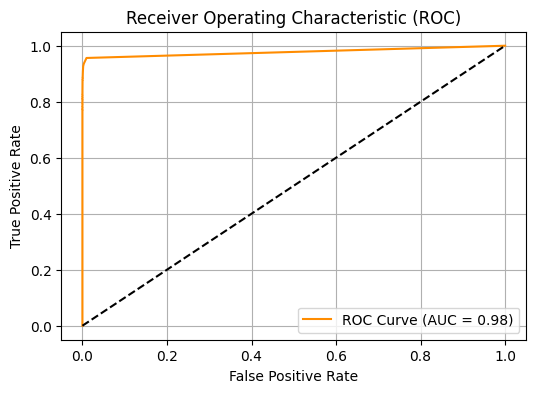

In [65]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], "k--")  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


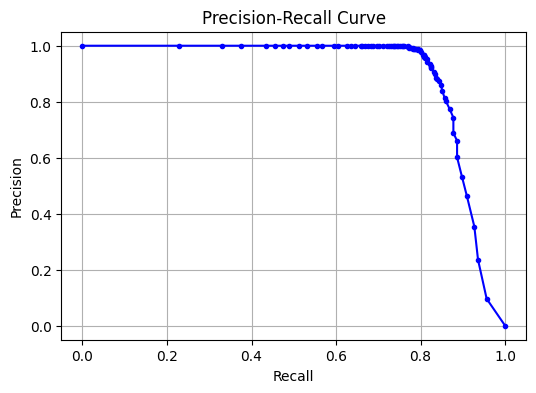

In [67]:
#Precision-Recall Curve (Useful for Imbalanced Data)
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


In [70]:
import joblib
joblib.dump(model, "fraud_model.pkl")


['fraud_model.pkl']

In [72]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [73]:
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load("fraud_model.pkl")

st.title("Online Payment Fraud Detection")

# Inputs from user
amount = st.number_input("Transaction Amount")
old_balance = st.number_input("Old Balance (Origin)")
new_balance = st.number_input("New Balance (Origin)")
type_ = st.selectbox("Transaction Type", [1, 2, 3, 4, 5])  # mapped as you did earlier

# Predict button
if st.button("Predict Fraud"):
    input_data = np.array([[type_, amount, old_balance, new_balance, ...]])  # match model features
    prediction = model.predict(input_data)[0]
    st.success("Fraud Detected!" if prediction == 1 else "No Fraud")


2025-06-28 08:35:55.240 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 08:35:55.331 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-28 08:35:55.332 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 08:35:55.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 08:35:55.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 08:35:55.336 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 08:35:55.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 08:35:55.339 Thread 'MainThread': mi